# Hent bilder for Harriet Backer (eller andre)

Bruker iiif-manifest, som gir alle bildene, sammen med search for bokhylla. Dataene fra den her notebooken er lagret til en fil (se nedenfor) så om det ikke endres noe kan dataene hentes fra den.

In [86]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import pandas as pd
import json

In [88]:
mu.css()

In [32]:
mu.update('nbpictures', silent=True)
import nbpictures as pic

Hent referanse til alle bildene. Funksjonen `find_urls` henter URLer. Fra dem peller vi ut URNene, og gir til `iiif_manifest`, som i sin tur gir alle bildene.

In [33]:
urls = pic.find_urls('Harriet Backer', page=0, mediatype='privatarkivmateriale')
for i in range(1,100):
    t = pic.find_urls('Harriet Backer', page = i, mediatype = 'privatarkivmateriale')
    if t == []:
        print(i)
        break
    else:
        urls += t


14


Så hentes URNene fra listen over URLer

In [40]:
urns = ['_'.join(url.split('/')[6].split('_')[:-1]) for url in urls]

In [42]:
urns[:3]

['URN:NBN:no-nb_digimanus_326898',
 'URN:NBN:no-nb_digimanus_81631',
 'URN:NBN:no-nb_digimanus_321355']

Med `iiif_manifest` kommer metadata.

In [70]:
pages = dict()
for urn in urns:
    x = pic.iiif_manifest(urn)
    pages[urn] = [page['images'][0]['resource']['@id'] for page in x['sequences'][0]['canvases']]

Lagre bildene til fil som en json-struktur

In [87]:
with open('bilder.json', 'w') as fp:
    json.dump(pages, fp)

## Filtrering av data med metadata

For videre filtrering kan`iiif_manifest` kjøres på nøklene i bildefilen. Så her er `bilder` akkurat det samme som `pages`.

In [89]:
with open('bilder.json') as fp:
    bilder = json.load(fp)

In [95]:
pic.iiif_manifest(list(bilder.keys())[4])

{'@context': 'http://iiif.io/api/presentation/2/context.json',
 '@type': 'sc:Manifest',
 '@id': 'https://api.nb.no/catalog/v1/iiif/URN:NBN:no-nb_digimanus_77958/manifest{?fields,profile}',
 'label': 'Brevs. 563 Brev fra Backer, Harriet (1845-1932) til Backer, Andreas (1830-)',
 'metadata': [{'label': 'Tilgang', 'value': 'Tilgang for alle'},
  {'label': 'Tittel',
   'value': 'Brevs. 563 Brev fra Backer, Harriet (1845-1932) til Backer, Andreas (1830-)'},
  {'label': 'Dato', 'value': '01.01.1910'},
  {'label': 'Andre opplysninger',
   'value': 'Udatert kladd. NBdigital: DokID: 77958.\n'},
  {'label': 'Kilde for metadata', 'value': 'hanske.nb.no (77958)'},
  {'label': 'Medietype', 'value': 'Brev og manuskripter'},
  {'label': 'Varig lenke',
   'value': '<a href="https://urn.nb.no/URN:NBN:no-nb_digimanus_77958" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digimanus_77958</a>'},
  {'label': '',
   'value': '<a href="https://www.nb.no/items/209386370072264926bbf3d190d3522f?manifest=https:/

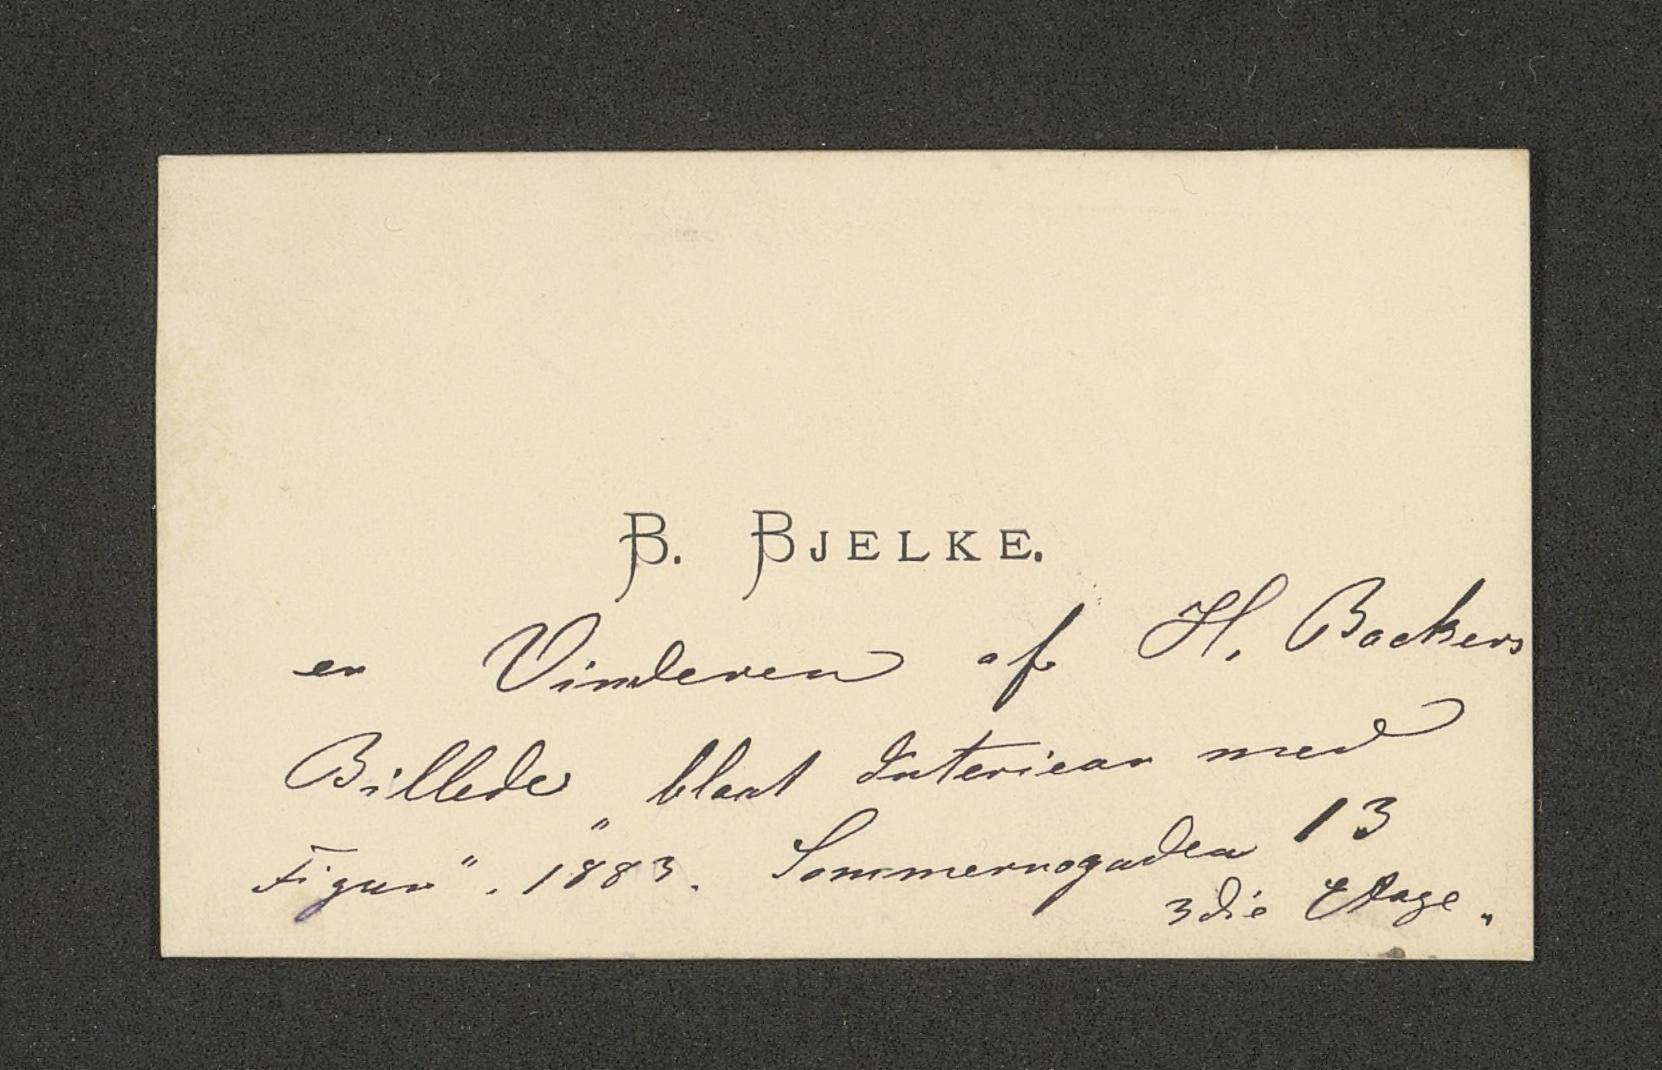

In [98]:
pic.get_picture_from_url(bilder['URN:NBN:no-nb_digimanus_326898'][0]).save()